In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.model_selection import train_test_split

from LLS_main import LLS

In [3]:
data = pd.read_csv("HousePrice.csv")
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [4]:
data["Parking"].replace(["True", "False"], [1, 0], inplace=True)
data["Warehouse"].replace(["True", "False"], [1, 0], inplace=True)
data["Elevator"].replace(["True", "False"], [1, 0], inplace=True)
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [5]:
data.drop("Address", axis=1, inplace=True)
data.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
0,63,1,True,True,True,1.850000e+09,61666.67
1,60,1,True,True,True,1.850000e+09,61666.67
2,79,2,True,True,True,5.500000e+08,18333.33
3,95,2,True,True,True,9.025000e+08,30083.33
4,123,2,True,True,True,7.000000e+09,233333.33


In [6]:
data.corr()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
Area,1.000000,0.670137,0.199765,0.073080,0.047987,0.720990,0.720990
Room,0.670137,1.000000,0.279249,0.126244,0.183216,0.569476,0.569476
Parking,0.199765,0.279249,1.000000,0.428073,0.429527,0.192993,0.192993
Warehouse,0.073080,0.126244,0.428073,1.000000,0.204242,0.109675,0.109675
Elevator,0.047987,0.183216,0.429527,0.204242,1.000000,0.110417,0.110417
Price,0.720990,0.569476,0.192993,0.109675,0.110417,1.000000,1.000000
Price(USD),0.720990,0.569476,0.192993,0.109675,0.110417,1.000000,1.000000


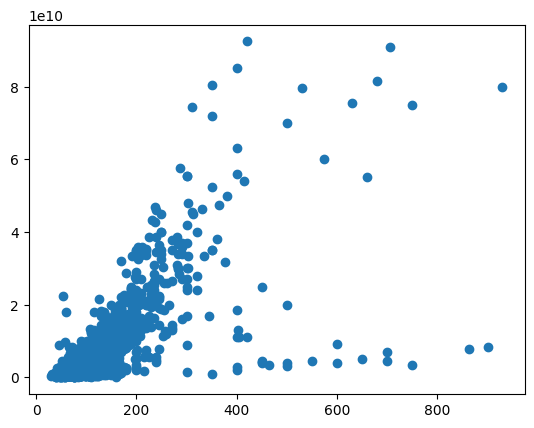

In [7]:
plt.scatter(data["Area"], data["Price"])
plt.show()

In [8]:
X = np.array(data[["Area"]])
Y = np.array(data[["Price"]])

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [10]:
lls = LLS()
lls.fit(X_train, Y_train)
Y_pred = lls.predict(X_test)
Y_pred

array([[1.31739735e+10],
       [6.45524703e+09],
       [5.59893875e+09],
       [2.30544537e+10],
       [4.74263047e+09],
       [5.26958941e+09],
       [5.26958941e+09],
       [6.91633610e+09],
       [5.26958941e+09],
       [1.02098295e+10],
       [4.80850034e+09],
       [9.02417186e+09],
       [3.62284272e+09],
       [5.13784967e+09],
       [5.73067848e+09],
       [1.08685282e+10],
       [8.89243213e+09],
       [5.59893875e+09],
       [4.61089073e+09],
       [4.21567153e+09],
       [8.82656226e+09],
       [6.58698676e+09],
       [1.11978775e+10],
       [5.73067848e+09],
       [5.92828809e+09],
       [8.03612385e+09],
       [4.94024007e+09],
       [4.74263047e+09],
       [1.18565762e+10],
       [3.62284272e+09],
       [1.31739735e+10],
       [7.11394570e+09],
       [8.23373345e+09],
       [6.45524703e+09],
       [5.26958941e+09],
       [1.17907063e+10],
       [5.59893875e+09],
       [7.24568544e+09],
       [7.44329504e+09],
       [5.00610994e+09],


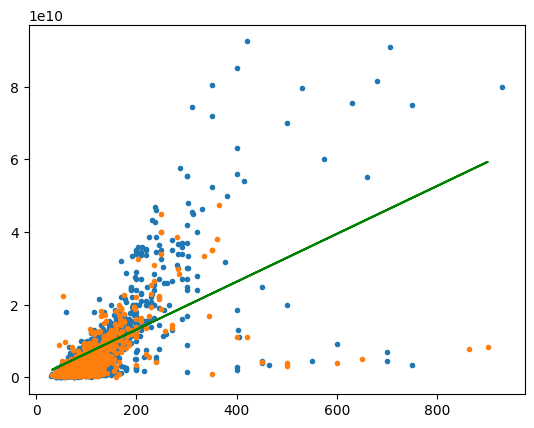

In [11]:
plt.scatter(X_train, Y_train, marker=".")
plt.scatter(X_test, Y_test, marker=".")
plt.plot(X_test, Y_pred, color= "green")
plt.show()

In [12]:
lls.evaluate(X_test, Y_test, "mae")

3590573376.5611744